In [117]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Define the problem

**Given**: dataset with various information about the Titanic passengers (age, sex, socio-economic status, cabin,...) 

**Goal**: analysis of what sorts of people were likely to survive.
    

## Prepare the data (Data Preprocessing)

### Load the data

We'll use the datasets provided by kaggle:[titanic/data](https://www.kaggle.com/c/titanic/data).

You can downloaded from here: [Titanic - all.zip](../datasets/Titanic/all.zip)

In [118]:
df_train = pd.read_csv("./datasets/Titanic/train.csv")
df_test = pd.read_csv("./datasets/Titanic/test.csv")

### Get insight of the data (Prepare and clean)

In [119]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [120]:
df_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [121]:
print(df_train.info())
print(df_test.info())
# print(data_df.columns.values.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null 

#### Clean

##### Check for NaN values

In [122]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Deal with NaN values

In [123]:
# Put port = Southampton for 'Embarked' null values:
df_train["Embarked"] = df_train["Embarked"].fillna("S")
df_test["Embarked"] = df_test["Embarked"].fillna("S")

# put the mean passengers age for 'Age' null values
df_train["Age"] = df_train["Age"].fillna(df_train["Age"].median())
df_test["Age"] = df_test["Age"].fillna(df_train["Age"].median())

# put 0 for cabin number for all 'Cabin' null values
df_train["Cabin"] = df_train["Cabin"].fillna(0)
df_test["Cabin"] = df_test["Cabin"].fillna(0)

In [124]:
# check again:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [125]:
#### Categorical text data => to numbers

In [126]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [127]:
df_train.loc[df_train["Sex"] == "male", "Sex"] = 0
df_train.loc[df_train["Sex"] == "female", "Sex"] = 1

df_test.loc[df_test["Sex"] == "male", "Sex"] = 0
df_test.loc[df_test["Sex"] == "female", "Sex"] = 1

df_train.loc[df_train["Embarked"] == "S", "Embarked"] = 0
df_train.loc[df_train["Embarked"] == "C", "Embarked"] = 1
df_train.loc[df_train["Embarked"] == "Q", "Embarked"] = 2

df_test.loc[df_test["Embarked"] == "S", "Embarked"] = 0
df_test.loc[df_test["Embarked"] == "C", "Embarked"] = 1
df_test.loc[df_test["Embarked"] == "Q", "Embarked"] = 2

# sex_new = np.where(df_train["Sex"] == "male", 1,0)

#### Visualize with Seaborn

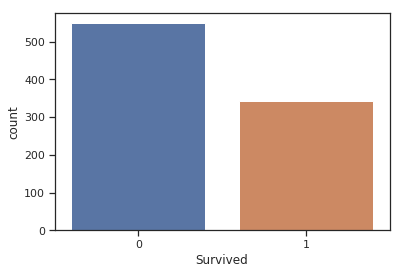

In [128]:
sns.countplot('Survived', data=df_train)


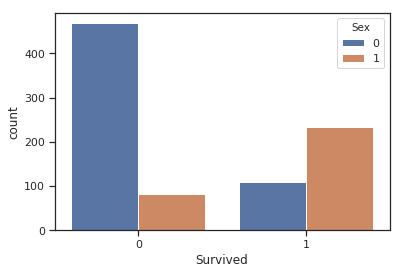

In [129]:
sns.countplot('Survived', hue='Sex', data=df_train)

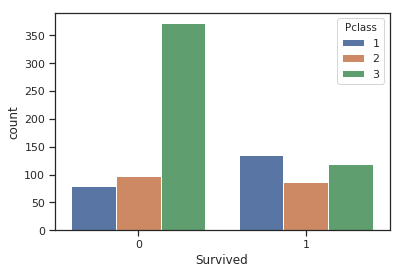

In [130]:
sns.countplot('Survived', hue='Pclass', data=df_train)

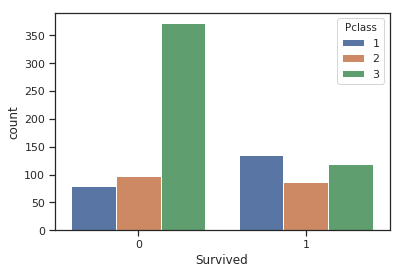

In [131]:
sns.countplot('Survived', hue='Pclass', data=df_train)

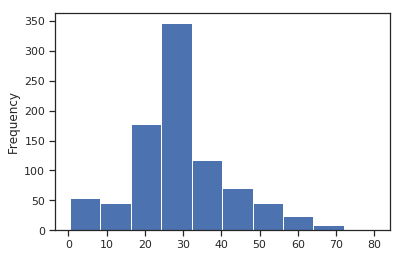

In [132]:
df_train['Age'].plot.hist()

In [133]:
# show correlations
df_train_corr = df_train.corr()

df_train['Sex']

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     1
15     1
16     0
17     0
18     1
19     1
20     0
21     0
22     1
23     0
24     1
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    1
864    0
865    1
866    1
867    0
868    0
869    0
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    1
883    0
884    0
885    1
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

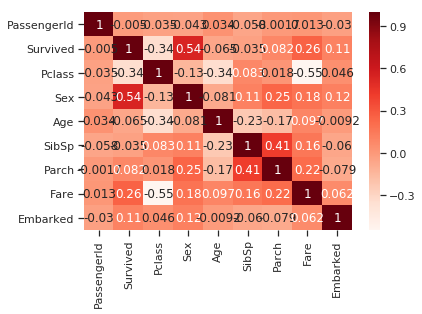

In [134]:
sns.heatmap(df_train_corr,annot=True, cmap="Reds")


## Select features

From the data inspection being made, I'll decide to use the 'TV' ads as a feature.    

In [135]:
X = df[['TV', 'newspaper', 'radio']]
y = df['sales']
print(y.shape)

NameError: name 'df' is not defined

## Separate the training data from the test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(f'X_train: {X_train[:5]}\n', f'y_train: {y_train[:5]}\n')
print(f'X_test: {X_test[:5]}\n', f'y_test: {y_test[:5]}\n')

## Choose the model

We saw some linear correlation between 'TV' ads and sales, that's why we are going to start with LinearRegression.

In [ ]:
from sklearn.linear_model import LinearRegression

## Train the model (fit the model)

In [ ]:
# instantiate the model
model = LinearRegression()

In [ ]:
fitted = model.fit(X_train,y_train)

In [ ]:
# let's check the "learned" co-efficients:
print(fitted.intercept_)
print(fitted.coef_)

### Interpret the coefficients

## Predict (classify unknown input sample)

In [ ]:
y_pred = fitted.predict(X_test)

## Evaluate the model

In [ ]:
from sklearn import metrics

In [ ]:
# get metrics:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

# print it
print('{:10s}: {}'.format('MAE: ', mae ) )
print('{:10s}: {}'.format('MSE: ', mse ) )
print('{:10s}: {}'.format('RMSE: ', rmse) )
print('{:10s}: {}'.format('r2_score', r2) )